<a href="https://colab.research.google.com/github/allan-gon/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# **Replicating Lesson Code**

In [0]:
from matplotlib import pyplot as plt
import pandas as pd

Data

In [0]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

Start graph

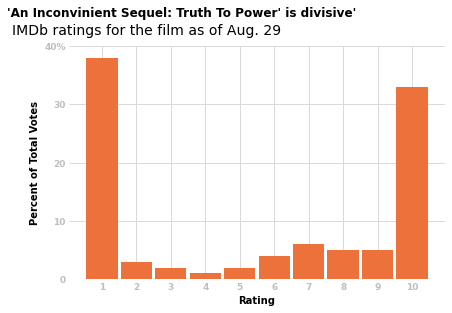

In [0]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

ax.bar(x =[1,2,3,4,5,6,7,8,9,10], height = fake,color='#ED713A',width=.91)

ax.set_facecolor('white')
fig.set_facecolor('white')

ax.set_yticks(range(0,41,10))
ax.set_yticklabels([0,10,20,30,'40%'], fontsize=9, color='#BFBFBF',fontweight='bold')

ax.set_xticks(range(1,11))
ax.set_xticklabels(range(1,11), fontsize=9, color="#BFBFBF", fontweight='bold')


ax.set_xlabel('Rating', fontsize = 10,fontweight="bold")

ax.set_ylabel('Percent of Total Votes', fontsize=10,fontweight='bold')

ax.set_title("'An Inconvinient Sequel: Truth To Power' is divisive'",x=.3,y=1.1,fontsize=12,fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29',x=-1.6,y=42)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(color="#DADADA")

plt.show()

# **Another Example**

In [0]:
from matplotlib.dates import date2num
from matplotlib.pyplot import plot_date
from matplotlib import pyplot as plt
import pandas as pd
#https://projects.fivethirtyeight.com/coronavirus-polls/

In [0]:
#this file is downloaded from the above sight
aprov_df = pd.read_csv("covid_approval_polls.csv")
aprov_df.head()

In [0]:
approve_subset = aprov_df[['end_date','approve','disapprove']]
approve_subset.dropna(inplace=True)
approve_subset.head()

In [0]:
approve_subset.dtypes

# I think its just 2 line graphs plotted against time

In [0]:
approve_subset.head(20)

In [0]:
temp = pd.to_datetime(approve_subset['end_date'].copy(), infer_datetime_format=True)
temp.head()
approve_subset['date'] = temp
approve_subset.drop(columns='end_date',inplace=True)
approve_subset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,approve,disapprove,date
0,41.0,54.0,2020-06-03
1,82.0,10.0,2020-06-03
2,5.0,92.0,2020-06-03
3,42.0,51.0,2020-06-03
4,38.0,46.0,2020-06-03


In [0]:
dates = date2num(approve_subset['date'])
values = approve_subset['approve']

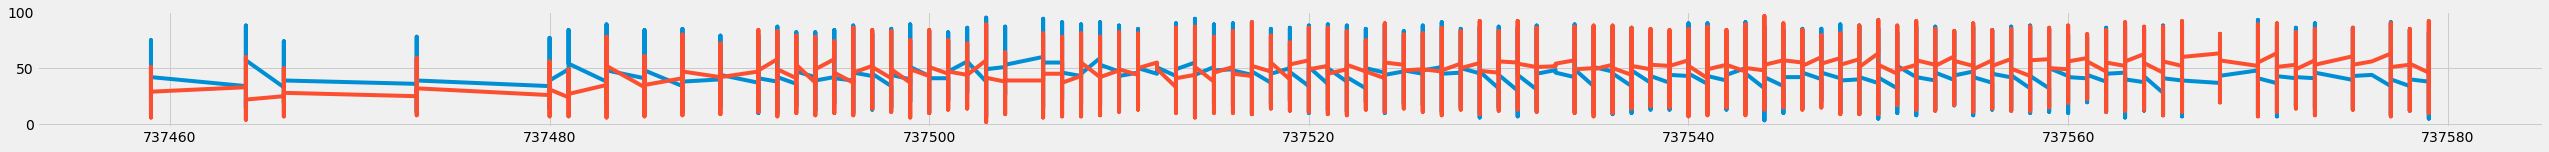

In [213]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(40,2)
ax.plot(dates,values)
ax.plot(dates,approve_subset['disapprove'])
#ax.plot(approve_subset['disapprove'])
#ax.plot(approve_subset['end_date'], approve_subset['approve'])
#ax.plot(approve_subset['end_date'], approve_subset['disapprove'])
#ax.set_xticklabels([f'{i.month}/{i.day}' for i in approve_subset['date']])
plt.show()

#plot_date(dates,values)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here